In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ucimlrepo import fetch_ucirepo
auto_mpg = fetch_ucirepo(id=9)
#x = auto_mpg.data.features # X featurelarƒ±n yer aldƒ±ƒüƒ± deƒüi≈üken
#y = auto_mpg.data.targets #y target deƒüi≈ükenimiz olan mpga'nƒ±n yer aldƒ±ƒüƒ± deƒüi≈üken

# sonradan ekliyorum bunu merak ettim heatmapte.
df = auto_mpg.data.original

In [ ]:
display(x.head())
display(y.head())


displacement  cylinders  horsepower  weight  acceleration  model_year  \
0         307.0          8       130.0    3504          12.0          70   
1         350.0          8       165.0    3693          11.5          70   
2         318.0          8       150.0    3436          11.0          70   
3         304.0          8       150.0    3433          12.0          70   
4         302.0          8       140.0    3449          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1

mpg
0  18.0
1  15.0
2  18.0
3  16.0
4  17.0

In [ ]:
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [ ]:
display(x.describe().T)
display(y.describe())

count         mean         std     min       25%     50%  \
displacement  398.0   193.425879  104.269838    68.0   104.250   148.5   
cylinders     398.0     5.454774    1.701004     3.0     4.000     4.0   
horsepower    392.0   104.469388   38.491160    46.0    75.000    93.5   
weight        398.0  2970.424623  846.841774  1613.0  2223.750  2803.5   
acceleration  398.0    15.568090    2.757689     8.0    13.825    15.5   
model_year    398.0    76.010050    3.697627    70.0    73.000    76.0   
origin        398.0     1.572864    0.802055     1.0     1.000     1.0   

                   75%     max  
displacement   262.000   455.0  
cylinders        8.000     8.0  
horsepower     126.000   230.0  
weight        3608.000  5140.0  
acceleration    17.175    24.8  
model_year      79.000    82.0  
origin           2.000     3.0

mpg
count  398.000000
mean    23.514573
std      7.815984
min      9.000000
25%     17.500000
50%     23.000000
75%     29.000000
max     46.600000

2.Eksik deƒüerlerin i≈ülenmesi

horsepowerda eksik veri var. Meanle doldurucam. STD sapmasƒ± muazzam b√ºy√ºk deƒüil. max deƒüer de √ßok y√ºksek deƒüil. Bir de mean ve medyan deƒüerleri √ßok yakƒ±n

In [ ]:
#x['horsepower'] = x['horsepower'].fillna(x['horsepower'].mean())
#x.info()

df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      398 non-null    object 
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   mpg           398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


3. Veri D√∂n√º≈ü√ºmleri

Aslƒ±nda origin √∂zelliƒüi kategorik. √á√ºnk√º sadece 3 tane √ße≈üidi var. Continuous deƒüil.

In [ ]:
#encoded_data = pd.get_dummies(x, columns=["origin"], prefix="origin")

# √∂ncelikle car_name'in regresyonda bir √∂nemi olmadƒ±ƒüƒ± i√ßin ben o s√ºtunu silicem. √áok √∂nemli olsaydƒ± encode edicektim sayƒ±sƒ± yoƒüun olana g√∂re

df = df.drop('car_name', axis=1)
df.head()

# bunu sonradan df olarak deniyorum. veriyi b√∂lmeden
encoded_data = pd.get_dummies(df, columns=["origin"], prefix=["origin"])

print("\nOne-Hot Encoding Sonrasƒ±:")
print(encoded_data)


One-Hot Encoding Sonrasƒ±:
     cylinders  displacement  horsepower  weight  acceleration  model_year  \
0            8         307.0       130.0    3504          12.0          70   
1            8         350.0       165.0    3693          11.5          70   
2            8         318.0       150.0    3436          11.0          70   
3            8         304.0       150.0    3433          12.0          70   
4            8         302.0       140.0    3449          10.5          70   
..         ...           ...         ...     ...           ...         ...   
393          4         140.0        86.0    2790          15.6          82   
394          4          97.0        52.0    2130          24.6          82   
395          4         135.0        84.0    2295          11.6          82   
396          4         120.0        79.0    2625          18.6          82   
397          4         119.0        82.0    2720          19.4          82   

      mpg  origin_1  origin_2  orig

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


≈ûimdi, √∂l√ßekleme i√ßin normal daƒüƒ±lƒ±yor mu daƒüƒ±lmƒ±yor mu diye baksƒ±n. Ona g√∂re √∂l√ßekleme y√∂ntemini bulsun. Bunun i√ßin shapiro test uygulayabilirim.

In [ ]:
from scipy.stats import shapiro
normal_dagilan = []
normal_dagilmayan = []

for eachcol in x:
    stat, p = shapiro(x[eachcol])
    print(f'{eachcol} s√ºtununun test istatistiƒüi: {stat} ')
    print(f'{eachcol} s√ºtununun p-deƒüeri: {p}')

    # p-deƒüeri 0.05'ten b√ºy√ºkse normal daƒüƒ±lƒ±m varsayƒ±lƒ±r
    if p > 0.05:
        print('Veriler normal daƒüƒ±lƒ±ma uyuyor.')
        normal_dagilan.append(eachcol)

    else:
        print('Veriler normal daƒüƒ±lƒ±ma uymuyor.')
        normal_dagilmayan.append(eachcol)


print(f"Normal daƒüƒ±lƒ±mƒ± olan s√ºtunlar: {normal_dagilan}\nNormal daƒüƒ±lƒ±mƒ± olmayan s√ºtunlar: {normal_dagilmayan}")

displacement s√ºtununun test istatistiƒüi: 0.8804189426889626 
displacement s√ºtununun p-deƒüeri: 5.143160627172132e-17
Veriler normal daƒüƒ±lƒ±ma uymuyor.
cylinders s√ºtununun test istatistiƒüi: 0.7487293777258881 
cylinders s√ºtununun p-deƒüeri: 3.8314955862059374e-24
Veriler normal daƒüƒ±lƒ±ma uymuyor.
horsepower s√ºtununun test istatistiƒüi: 0.9051280944474029 
horsepower s√ºtununun p-deƒüeri: 4.565951886369039e-15
Veriler normal daƒüƒ±lƒ±ma uymuyor.
weight s√ºtununun test istatistiƒüi: 0.9413595163675316 
weight s√ºtununun p-deƒüeri: 1.9702505608681832e-11
Veriler normal daƒüƒ±lƒ±ma uymuyor.
acceleration s√ºtununun test istatistiƒüi: 0.9923786617732914 
acceleration s√ºtununun p-deƒüeri: 0.03986944421633885
Veriler normal daƒüƒ±lƒ±ma uymuyor.
model_year s√ºtununun test istatistiƒüi: 0.9458510376482036 
model_year s√ºtununun p-deƒüeri: 6.961580786911914e-11
Veriler normal daƒüƒ±lƒ±ma uymuyor.
origin s√ºtununun test istatistiƒüi: 0.6739071245015928 
origin s√ºtununun p-deƒüeri: 5.79

In [ ]:
#yine hi√ßbir deƒüi≈ükenimiz normal daƒüƒ±lmadƒ±. o halde min-max uygulayacaƒüƒ±m. Ama split ettikten sonra.

#from sklearn.preprocessing import MinMaxScaler

#for eachcol in normal_dagilmayan:
    #for d√∂ng√ºs√º sayesinde bir listenin elemanlarƒ± √ºzerinde i≈ülem yapabiliyorum.


#    scaler = MinMaxScaler()
#    minmax_scaled = scaler.fit_transform(x[[eachcol]])
 #   minmax_df = pd.DataFrame(minmax_scaled, columns=x[[eachcol]].columns)
  #  print("Min-Max √ñl√ßeklenmi≈ü Veri:")
   # print(minmax_df)


#x.head()

Burada standartla≈ütƒ±rma yapmƒ±cam. √ß√ºnk√º verinin orijinalinde x, y diye ayrƒ±lmƒ±≈ü olsa da hen√ºz kƒ±rmadƒ±k veriyi. xtrain xtest diye.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

x = encoded_data.drop('mpg', axis=1)
y = encoded_data['mpg']

#1. √ñncelikle datayƒ± split ediyorum train ve test olarak
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#boyut yazdƒ±rma
print("Eƒüitim Seti Boyutu:", x_train.shape)
print("Test Seti Boyutu:", x_test.shape)

#ben bi min-max standartla≈ütƒ±rma yapayƒ±m
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



# 2. Lineer Regresyon Modeli Olu≈üturma
model = LinearRegression()

#3. Modeli Eƒüitme
model.fit(x_train, y_train)

# 4. Test Seti ile Tahmin Yapma
y_pred = model.predict(x_test)

# 5. Model Performansƒ±nƒ± Deƒüerlendirme (MSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. sonu√ßlarƒ±nƒ± ekrana yazdƒ±rma
print(f"\n{model} Performans Metrikleri:")
print("-------------------------------------")
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"R¬≤ Score (R-squared): {r2:.4f}")
print("-------------------------------------")
# bu arada toplu i√ßeri bir tab kaydƒ±rmayƒ± √∂ƒürendim."Shift+tab". Toplu bir tab kaydƒ±rma ise se√ßip "tab"
# iki noktadan sonra konulan .4f .dan sonra sadece 4 basamak olsun demekmi≈ü.

Eƒüitim Seti Boyutu: (318, 9)
Test Seti Boyutu: (80, 9)

LinearRegression() Performans Metrikleri:
-------------------------------------
MSE (Mean Squared Error): 8.3391
MAE (Mean Absolute Error): 2.2876
R¬≤ Score (R-squared): 0.8449
-------------------------------------


Bu arada ilk ba≈üta veriyi split etmeden standartla≈ütƒ±rmƒ±≈ütƒ±m. R2 daha y√ºksek gelmi≈üti. ama ≈üu an split ettikten sonra standartla≈ütƒ±rdƒ±m. R2 biraz d√º≈üt√º normal olarak.

R¬≤ Score'u 1'e yakƒ±n. Modelin test veri setindeki hedef deƒüi≈ükenin yakla≈üƒ±k %85'ini doƒüru bir ≈üekilde a√ßƒ±klayabildiƒüini g√∂steriyor.

MAE ve MSE arasƒ±nda muazzam bir fark yok. Yani hata oranƒ± da d√º≈ü√ºk. Ama overfit var mƒ± diye ≈ü√ºphelendim.

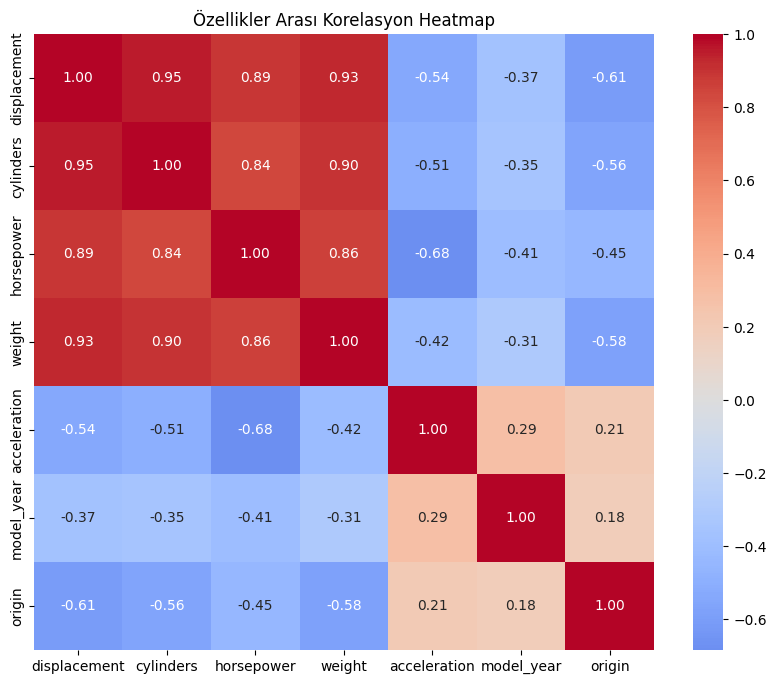

In [ ]:
# Yukarƒ±da veriye df adƒ± verdim. ayrƒ±lmamƒ±≈ü halini g√∂rmek i√ßin ve √∂l√ßekleme yapmadƒ±m. sadece korelasyonu g√∂rmek istiyorum.

corr_matrix = x.corr()

# Heatmap olu≈üturma
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('√ñzellikler Arasƒ± Korelasyon Heatmap')
plt.show()

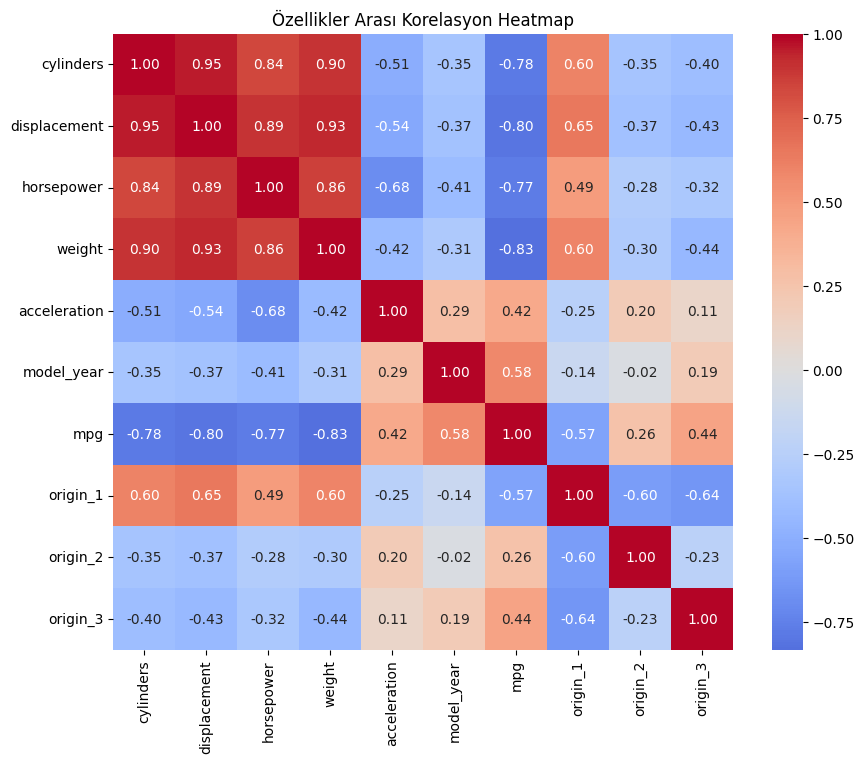

In [ ]:

# x ve y arasƒ±ndaki korelasyonu da g√∂rmek istiyorum
corr_matrix = encoded_data.corr()

# Heatmap olu≈üturma
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('√ñzellikler Arasƒ± Korelasyon Heatmap')
plt.show()

cylinder, displacement, horsepower, weight arasƒ±nda √ßok kuvvetli bir ili≈üki g√∂r√ºl√ºyor. VIF ya da ridge/lasso yapƒ±cam.

√ñncesinde silindiri √ßƒ±karƒ±cam. √á√ºnk√º zaten displacementƒ± hesaplamak i√ßin kullanƒ±lƒ±yor.

In [ ]:
encoded_data = encoded_data.drop('cylinders', axis=1)

In [ ]:
encoded_data.head()

displacement  horsepower  weight  acceleration  model_year   mpg  origin_1  \
0         307.0       130.0    3504          12.0          70  18.0      True   
1         350.0       165.0    3693          11.5          70  15.0      True   
2         318.0       150.0    3436          11.0          70  18.0      True   
3         304.0       150.0    3433          12.0          70  16.0      True   
4         302.0       140.0    3449          10.5          70  17.0      True   

   origin_2  origin_3  
0     False     False  
1     False     False  
2     False     False  
3     False     False  
4     False     False

Y√ºksek aƒüƒ±rlƒ±k MPG'yi d√º≈ü√ºr√ºyormu≈ü. Weight'i silemem. Yeni bir √∂zellik ekleyeceƒüim.

In [ ]:
# ters orantƒ±lƒ± olduklarƒ± i√ßin b√∂lmek mantƒ±klƒ±.
encoded_data['mpg_per_weight'] = encoded_data['mpg'] / encoded_data['weight']

# kg arttƒ±k√ßa mpg dd√º≈ü√ºyor. yani bir galon ile gidilebilecek mil uzunluƒüu
encoded_data.head()

displacement  horsepower  weight  acceleration  model_year   mpg  origin_1  \
0         307.0       130.0    3504          12.0          70  18.0      True   
1         350.0       165.0    3693          11.5          70  15.0      True   
2         318.0       150.0    3436          11.0          70  18.0      True   
3         304.0       150.0    3433          12.0          70  16.0      True   
4         302.0       140.0    3449          10.5          70  17.0      True   

   origin_2  origin_3  mpg_per_weight  
0     False     False        0.005137  
1     False     False        0.004062  
2     False     False        0.005239  
3     False     False        0.004661  
4     False     False        0.004929

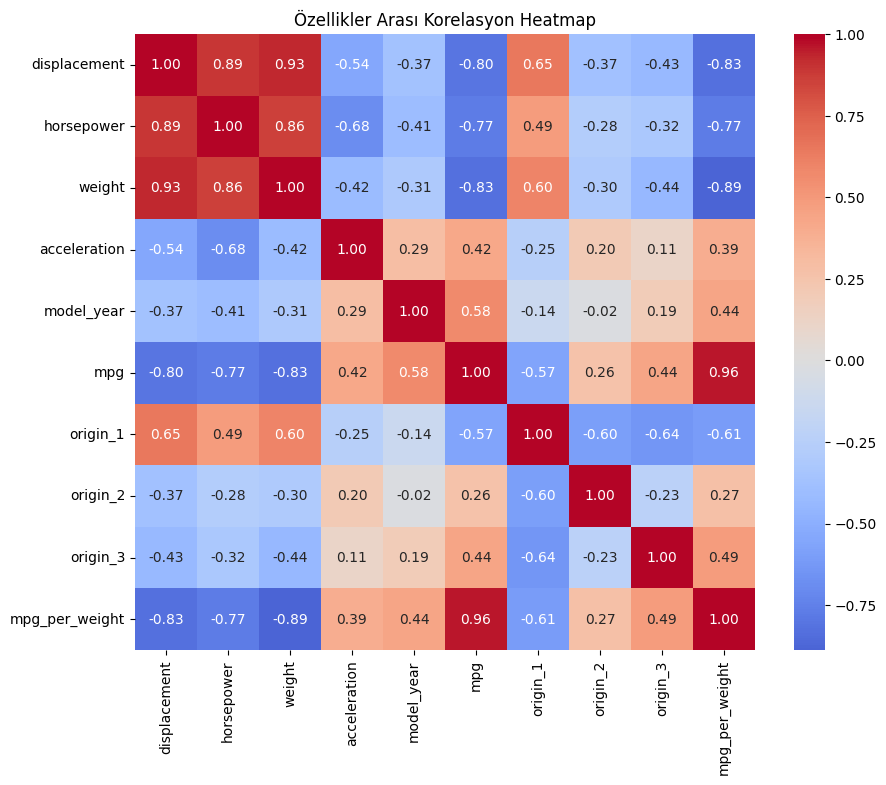

In [ ]:
corr_matrix = encoded_data.corr()

# Heatmap olu≈üturma
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('√ñzellikler Arasƒ± Korelasyon Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


x = encoded_data.drop('mpg', axis=1)
y = encoded_data['mpg']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Veri √∂l√ßeklendirme (standardizasyon)
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


#√∂l√ßeklendiklerini g√∂rmek istedim
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_train_scaled.head()

# Model olu≈üturma
lr_model = LinearRegression()

# Modeli eƒüitme
lr_model.fit(x_train_scaled, y_train)

# Test seti ile tahmin yapma
y_pred = lr_model.predict(x_test_scaled)

# Performans deƒüerlendirme
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Sonu√ßlarƒ± yazdƒ±ralƒ±m
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R¬≤: {r2}")


MAE: 1.182495455932889
MSE: 2.088582984788639
R¬≤: 0.9611545261483164


R2 √ßok y√ºkseldi. hata oranƒ± d√º≈üt√º. Lakin model overfit mi oldu emin olamadƒ±m. Yukarƒ±da √∂l√ßeklenmi≈ü veriyle eƒüitmedim modeli. Onun etkisi olabilir. Ama √∂yle olsaydƒ± daha y√ºksek olurdu sonu√ß . Weight modeli domine edeceƒüinden.

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split

cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"Cross-validation RMSE scores: {cv_rmse_scores}")
print(f"Mean CV RMSE: {cv_rmse_scores.mean():.4f}")

# T√ºm eƒüitim verisiyle modeli eƒüit, test verisinde performansa bak
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test set RMSE: {test_rmse:.4f}")

# Overfitting kontrol√º
if test_rmse > cv_rmse_scores.mean() + 5:  # e≈üik sana baƒülƒ±, burada ¬±5 birim √∂rnek
    print("‚ö†Ô∏è Muhtemelen overfitting var.")
elif test_rmse < cv_rmse_scores.mean() - 5:
    print("üìà Muhtemelen underfitting yok, test performansƒ± beklenenden iyi.")
else:
    print("‚úÖ Modelin genelleme performansƒ± iyi g√∂r√ºn√ºyor.")

Cross-validation RMSE scores: [1.61339907 1.81735445 1.64693861 1.7945664  1.60425361]
Mean CV RMSE: 1.6953
Test set RMSE: 1.4452
‚úÖ Modelin genelleme performansƒ± iyi g√∂r√ºn√ºyor.


bi model eƒüitmi≈üim olayyy.  cross_val_score metodu ile bir skor deƒüi≈ükeni olu≈üturuyorum. mse ve rmse deƒüerleri yakƒ±n

In [ ]:
from joblib import dump

# Modeli kaydet
dump(lr_model,'/content/drive/MyDrive/Colab Notebooks/Acunmedya/7.hafta/ML_7week.joblib')

print("Model ba≈üarƒ±yla kaydedildi!")

Model ba≈üarƒ±yla kaydedildi!


In [ ]:
!pip install streamlit joblib scikit-learn

streamlit ile de aray√ºz olu≈üturmaya √ßalƒ±≈ütƒ±m bilgisayar terminalinden. web sayfasƒ± a√ßƒ±ldƒ± ama githubla baƒülamadƒ±ƒüƒ±m i√ßin streamliti devam etmedim. diƒüer √∂devde bir daha denicem.

In [ ]:
import streamlit as st
import numpy as np
import joblib

# Modeli y√ºkle
model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Acunmedya/7.hafta/ML_7week.joblib')

# Sayfa ba≈ülƒ±ƒüƒ±
st.title("Lineer Regresyon Tahmin Uygulamasƒ±")

# Girdi alanlarƒ± (√∂rnek 4 √∂zellikli veri i√ßin)
st.write("L√ºtfen model i√ßin gerekli √∂zellikleri girin:")
feature_1 = st.number_input("√ñzellik 1", value=320.0)
feature_2 = st.number_input("√ñzellik 2", value=190.0)
feature_3 = st.number_input("√ñzellik 3", value=10.0)
feature_4 = st.number_input("√ñzellik 4", value=80.0)

# Tahmin butonu
if st.button("Tahmin Et"):
    # Girdileri numpy array'e d√∂n√º≈üt√ºr
    input_data = np.array([[feature_1, feature_2, feature_3, feature_4]])

    # Tahmini yap
    prediction = model.predict(input_data)

    # Sonucu g√∂ster
    st.success(f"Tahmin Edilen Deƒüer: {prediction[0]:.2f}")

2025-04-07 16:20:13.379 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:20:14.542 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-07 16:20:14.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:20:14.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:20:14.563 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:20:14.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:20:14.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:20:14.573 Thread 'MainThread': mi